In [26]:
RATE = 0.036

In [27]:
LOAN = 80

In [ ]:
YEAR = 30

In [14]:
def interest_sum(a, r, n):
  return a * r * n

In [15]:
def geometric_sum(a, r, n):
  return a * (1 - r**n) / (1 - r)

In [43]:
IRR = RATE / 12

In [44]:
geometric_sum(3000, 1/(1+IRR), 360)

661834.5482934909

In [48]:
RATE = 0.028
IRR = RATE / 12
geometric_sum(100, 1/(1+IRR), 360)

24393.937420576498

In [49]:
RATE = 0.04
IRR = RATE / 12
geometric_sum(100, 1/(1+IRR), 360)

21015.94445890392

In [ ]:
LOAN = 500000


In [31]:
interest_sum(LOAN, RATE, YEAR)

86.39999999999999

In [41]:
800000 * 1.036 / 12

69066.66666666667

In [37]:
def NPV(r, year, monthly_payment, loan):
  return geometric_sum(monthly_payment, 1/(1+r/12), year*12) - loan

In [ ]:
def nominal_rate_algorithm():
  total_interest = interest_sum(LOAN, RATE, YEAR)
  return LOAN + total_interest

In [38]:
from scipy.optimize import minimize

def compute_effective_rate(nominal_rate, year):
  loan = 100
  monthly_payment = (loan + interest_sum(loan, nominal_rate, year)) / (year * 12)
  monthly_discount_rate = (1/(1+nominal_rate))**(1./12)
  res = minimize(lambda r: (NPV(r, year, monthly_payment, loan))**2, monthly_discount_rate, method='Nelder-Mead', tol=1e-6)
  return res.x[0]

In [42]:
from scipy.optimize import minimize

res = minimize(lambda x: (x-2)**2, 0, method='Nelder-Mead', tol=1e-6)
res.x[0]

2.000000000000002

In [39]:
compute_effective_rate(0.015, 30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


0.02663471896810252

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


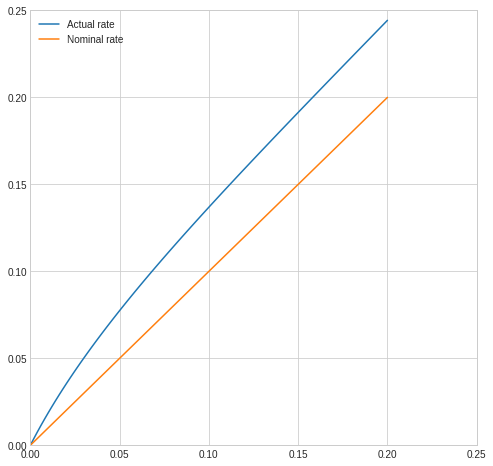

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

from functools import partial

fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

x = np.linspace(0, 0.2, 100)
map_to_actual_rate = partial(compute_effective_rate, year=25)
ax.plot(x, list(map(map_to_actual_rate, x)), label='Actual rate')
ax.plot(x, x, label='Nominal rate')
plt.xlim([0, 0.25])
plt.ylim([0, 0.25])
plt.legend()

In [ ]:
map_to_actual_rate(0.05)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


0.07742503932147489

In [ ]:
map_to_actual_rate(0.13)

0.1698645169328695

In [ ]:
100 * (1 + 0.05)

105.0

In [ ]:
monthly_compound = partial(geometric_sum, a=100, n=12)

In [ ]:
100 * (1 + 0.05/12)**12

105.1161897881733

In [ ]:
import numpy as np

def find_monthly_rate(monthly_rate):
  res = minimize(lambda yearly_rate: ((1 + yearly_rate)**25 - (1 + monthly_rate/12)**(12*25))**2, monthly_rate, method='Nelder-Mead', tol=1e-6)
  return res.x[0]

def find_exp_rate(exp_rate):
  res = minimize(lambda yearly_rate: ((1 + yearly_rate) - np.exp(exp_rate))**2, exp_rate, method='Nelder-Mead', tol=1e-6)
  return res.x[0]

In [ ]:
find_exp_rate(0.05)

0.0512713623046875

In [ ]:
find_monthly_rate(0.05)

0.05116210937500001

In [ ]:
(6599.6 * 240 - 1000000)/20/1000000

0.0291952

In [ ]:
1078 / 240000.

0.004491666666666666

In [ ]:
(1078 * 360 - 240000) / 30 / 240000

0.020566666666666667

In [ ]:
geometric_sum(1078, (1/(1+0.0358))**(1./12), 360)

240095.82972520927

In [ ]:
geometric_sum(1078, (1/(1+0.03526/12)), 360)

239994.23461731867

In [ ]:
def calculate_irr_from_monthly_pay(month_pay, n_term, capital):
  geometric_sum(6599.6, (1/(1+0.0079))**(1./12), 360)